# Regression Logistique 

 La fonction de projection de toute valeur réelle dans l'intervalle [0,1] s'appelle la fonction logistique.

 Fonction de régression linéaire:  y = ax + b
 Fonction de régression logistique: z = f(y) = f(ax + b)

Régression logistique vs régression linéaire
La principale différence entre la régression logistique et la régression linéaire est que la régression logistique fournit un résultat constant, tandis que la régression linéaire fournit un résultat continu.

Dans la régression logistique, le résultat, tel qu'une variable dépendante, n'a qu'un nombre limité de valeurs possibles. Cependant, en régression linéaire, le résultat est continu, ce qui signifie qu'il peut avoir n'importe laquelle parmi un nombre infini de valeurs possibles.

La régression logistique est utilisée lorsque la variable réponse est catégorique, comme oui/non, vrai/faux et réussite/échec. La régression linéaire est utilisée lorsque la variable réponse est continue, comme le nombre d'heures, la taille et le poids.

In [8]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [14]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=808).fit(X, y)
#random_state is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
clf.predict([X[8, :]]) #on demande de prédire le résultat de la ligne 8

array([0])

In [22]:
clf.predict_proba([X[8, :]])

array([[0.68692892, 0.31307108]])

In [24]:
y_pred = clf.predict(X)

### Metriques du modèle: Exactitude, Rappelle et Précision

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [61]:
print("Accuracy score: ", accuracy_score(y, y_pred)) #échantillons bien classés / échantillons au total
print("Precision score: ", precision_score(y, y_pred)) #TP / (TP + FP)
print("Recall score: ", recall_score(y, y_pred)) #TP / (TP + FN)

Accuracy score:  0.9472759226713533
Precision score:  0.947945205479452
Recall score:  0.969187675070028


In [33]:
confusion_matrix(y, y_pred)

array([[193,  19],
       [ 11, 346]])

### Changer le seuil

In [37]:
y_hat_proba = clf.predict_proba(X)[:,1]

In [47]:
y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ] 
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ] 

In [49]:
confusion_matrix(y, y_pred_03) #il y a plus de possibilité qu'on arrondi à 1 donc ça reduit les faux négatifs (6)

array([[186,  26],
       [  6, 351]])

In [51]:
confusion_matrix(y, y_pred_07) #il y a plus de possibilité qu'on arrondi à O donc ça reduit les faux positifs (12)

array([[200,  12],
       [ 18, 339]])

## Exercise

### Chargement du dataset

In [65]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

### Initiation du modèle

In [92]:
from sklearn.linear_model import LogisticRegression

### Split train test

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

### Entrainement 

In [115]:
clf = LogisticRegression(random_state=808).fit(X_train,y_train)

### Prédiction

In [118]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

### Statistiques

In [121]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  9]])

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### ROC Curve

In [132]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and clf is your trained classifier
# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes based on your dataset
n_classes = y_test_bin.shape[1]

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])

# Now fpr and tpr contain the false positive rates and true positive rates for each class

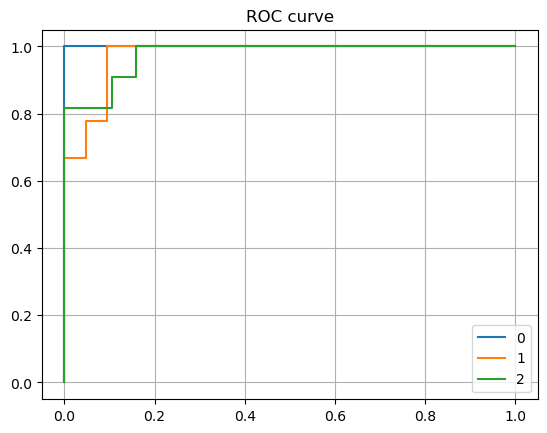

In [146]:
import matplotlib.pyplot as plt
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = i)
    plt.grid()
    plt.legend()
    plt.title("ROC curve")